* Week6 Decision Trees

🌟 Highlights 🌟
👉

Dataset
In this homework, we will use the California Housing Prices from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).
The goal of this homework is to create a regression model for predicting housing prices (column 'median_house_value').

In [1]:
# get data
# data = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv"
# !wget $data

--2023-10-22 17:03:03--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  1.91MB/s    in 0.7s    

2023-10-22 17:03:04 (1.91 MB/s) - ‘housing.csv’ saved [1423529/1423529]



Preparing the dataset
For this homework, we only want to use a subset of data. This is the same subset we used in homework #2. But in contrast to homework #2, we are going to use all columns of the dataset.

First, keep only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND'

Preparation:

Fill missing values with zeros.
Apply the log transform to ```median_house_value```.
Do train/validation/test split with 60%/20%/20% distribution.
Use the ```train_test_split``` function and set the ```random_state``` to 1.
Use ```DictVectorizer(sparse=True)``` to turn the dataframes into matrices.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

%matplotlib inline

In [2]:
# cleaning data
df = pd.read_csv("housing.csv")
df_portion = df.copy()[
    (df["ocean_proximity"] == "<1H OCEAN") | (df["ocean_proximity"] == "INLAND")
    ]
df_portion

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
df_portion.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [4]:
# Fill missing values with zeros.
df_portion.fillna(0, inplace=True)
df_portion.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [5]:
#Apply the log transform to median_house_value
df_portion["median_house_value"] = np.log1p(df_portion["median_house_value"])
df_portion

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,12.973866,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,12.287657,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,12.419574,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,12.554971,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,12.287196,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,11.265758,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,11.252872,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,11.432810,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,11.346883,INLAND


In [6]:
# Do train/validation/test split with 60%/20%/20% distribution.

from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(df_portion, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [7]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [8]:
y_train = df_train["median_house_value"].values
y_val = df_val["median_house_value"].values
y_test = df_test["median_house_value"].values

In [9]:
del df_train["median_house_value"]
del df_val["median_house_value"]
del df_test["median_house_value"]

df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-120.25,37.93,13.0,493.0,76.0,196.0,68.0,3.3750,INLAND
1,-118.40,34.00,10.0,1526.0,339.0,705.0,268.0,5.8083,<1H OCEAN
2,-121.67,38.85,46.0,645.0,131.0,410.0,122.0,1.7417,INLAND
3,-118.14,33.88,24.0,3305.0,982.0,2085.0,881.0,2.6641,<1H OCEAN
4,-118.11,33.92,34.0,1414.0,263.0,983.0,264.0,4.1767,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
9406,-118.00,34.12,37.0,1340.0,325.0,928.0,333.0,3.9219,INLAND
9407,-118.10,34.10,34.0,2578.0,645.0,1628.0,617.0,2.3400,<1H OCEAN
9408,-117.45,34.01,26.0,3042.0,598.0,1720.0,551.0,2.7600,INLAND
9409,-117.94,34.03,35.0,1375.0,249.0,1015.0,239.0,4.0521,<1H OCEAN


Question 1
Let's train a decision tree regressor to predict the median_house_value variable.

Train a model with max_depth=1.
Which feature is used for splitting the data?

- **ocean_proximity**
- total_rooms
- latitude
- population

In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text
import numpy as np


In [11]:
# train a model

train_dicts = df_train.fillna(0).to_dict(orient="records")
dv = DictVectorizer(sparse=True)
X_train = dv.fit_transform(train_dicts)
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [16]:
val_dicts = df_val.to_dict(orient="records")
X_val = dv.transform(val_dicts)


In [12]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- ocean_proximity=<1H OCEAN <= 0.50
|   |--- value: [11.61]
|--- ocean_proximity=<1H OCEAN >  0.50
|   |--- value: [12.30]



Question 2
Train a random forest model with these parameters:

n_estimators=10
random_state=1
n_jobs=-1 (optional - to make training faster)
What's the RMSE of this model on validation?

- 0.045
- **0.245**
- 0.545
- 0.845

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# training RandomForest model
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)


RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [22]:
# calculate the RMSE
y_pred = rf.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

print(f"RMSE: {rmse}")

RMSE: 0.24501215124257714


Question 3
Now let's experiment with the n_estimators parameter

Try different values of this parameter from 10 to 200 with step 10.
Set random_state to 1.
Evaluate the model on the validation dataset.
After which value of n_estimators does RMSE stop improving? Consider 3 decimal places for retrieving the answer.

- 10
- 25
- 50
- **160**

In [24]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n,
                               random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    scores.append((n, rmse))

In [25]:
columns = ["n_estimators", "rmse"]
df_scores = pd.DataFrame(scores, columns=columns)
df_scores

,n_estimators,rmse
0,10,0.245012
1,20,0.239098
2,30,0.236946
3,40,0.235247
4,50,0.235289
5,60,0.234992
6,70,0.234870
7,80,0.234975
8,90,0.234867
9,100,0.234579


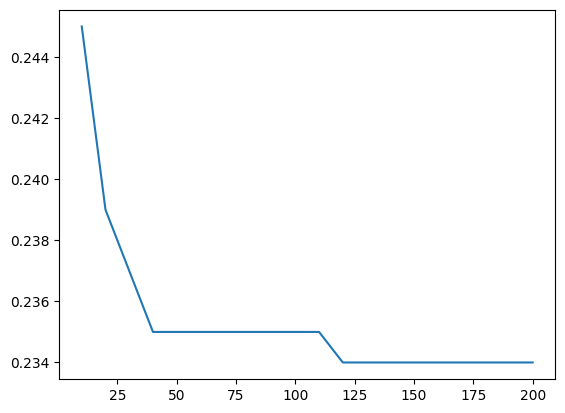

In [29]:
# plot the scores
from matplotlib import pyplot as plt

plt.plot(df_scores.n_estimators, df_scores.rmse.round(3))


Question 4
Let's select the best max_depth:

Try different values of max_depth: [10, 15, 20, 25]
For each of these values,
try different values of n_estimators from 10 till 200 (with step 10)
calculate the mean RMSE
Fix the random seed: random_state=1
What's the best max_depth, using the mean RMSE?

- 10
- 15
- **20**
- 25

In [30]:
scores = []

for d in [10, 15, 20, 25]:
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n,
                                   max_depth=d,
                                   random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        scores.append((d, n, rmse))

In [31]:
columns = ["max_depth", "n_estimators", "rmse"]
df_scores = pd.DataFrame(scores, columns=columns)

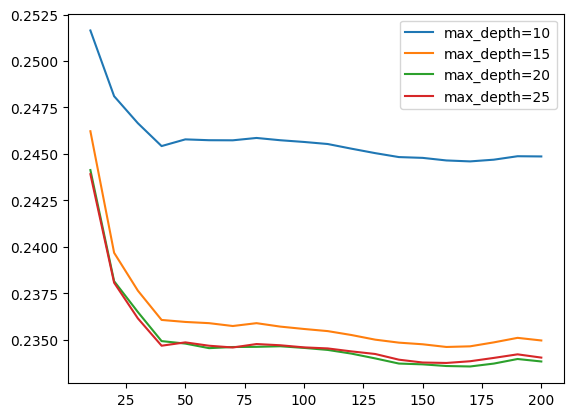

In [32]:
for d in [10, 15, 20, 25]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.rmse, label=f"max_depth={d}")

plt.legend()

Question 5
We can extract feature importance information from tree-based models.

At each step of the decision tree learning algorithm, it finds the best split. When doing it, we can calculate "gain" - the reduction in impurity before and after the split. This gain is quite useful in understanding what are the important features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the feature_importances_ field.

For this homework question, we'll find the most important feature:

Train the model with these parameters:
n_estimators=10,
max_depth=20,
random_state=1,
n_jobs=-1 (optional)
Get the feature importance information from this model
What's the most important feature (among these 4)?

- total_rooms
- **median_income**
- total_bedrooms
- longitude

In [33]:
# train the model
rf = RandomForestRegressor(n_estimators=10, max_depth=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=10, n_jobs=-1, random_state=1)

In [34]:
rf.feature_importances_

array([0.00888551, 0.02144402, 0.09338965, 0.07538322, 0.35697444,
       0.32499755, 0.08206731, 0.01550023, 0.00824898, 0.01310909])

In [35]:
# create a dataframe of features
df_importance = pd.DataFrame()
df_importance["feature"] = dv.feature_names_
df_importance["importance"] = rf.feature_importances_
df_importance

,feature,importance
0,households,0.008886
1,housing_median_age,0.021444
2,latitude,0.093390
3,longitude,0.075383
4,median_income,0.356974
5,ocean_proximity=<1H OCEAN,0.324998
6,ocean_proximity=INLAND,0.082067
7,population,0.015500
8,total_bedrooms,0.008249
9,total_rooms,0.013109


In [36]:
# find the highest value
df_importance.sort_values(by="importance", ascending=False)

,feature,importance
4,median_income,0.356974
5,ocean_proximity=<1H OCEAN,0.324998
2,latitude,0.093390
6,ocean_proximity=INLAND,0.082067
3,longitude,0.075383
1,housing_median_age,0.021444
7,population,0.015500
9,total_rooms,0.013109
0,households,0.008886
8,total_bedrooms,0.008249


Question 6
Now let's train an XGBoost model! For this question, we'll tune the eta parameter:

Install XGBoost
Create DMatrix for train and validation
Create a watchlist
Train a model with these parameters for 100 rounds:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
Now change eta from 0.3 to 0.1.

Which eta leads to the best RMSE score on the validation dataset?

- **0.3**
- 0.1
- Both give equal value

In [37]:
%pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 6.8 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [40]:
import xgboost as xgb

features = list(dv.get_feature_names_out())
features = [feature.replace("=<", "_") for feature in features]
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)


In [41]:
# eta: 0.3
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100)

In [42]:
y_pred = model.predict(dval)
np.sqrt(mean_squared_error(y_val, y_pred))

0.228623199980106

In [43]:
# eta: 0.1
xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100)

y_pred = model.predict(dval)
np.sqrt(mean_squared_error(y_val, y_pred))

0.2320892712160934